In [11]:
import pandas as pd
import os
import numpy as np
extra_data_dir = 'V:/data_repos/hpi/extra'
extra_data_csv = os.path.join(extra_data_dir, 'subcellular_location.tsv')
subcellular_location = pd.read_csv(extra_data_csv, sep="\t",index_col = None)

In [12]:
subcellular_location.head()

,Gene,Gene name,Reliability,Enhanced,Supported,Approved,Uncertain,Single-cell variation intensity,Single-cell variation spatial,Cell cycle dependency,GO id
0,ENSG00000000003,TSPAN6,Approved,NaN,NaN,Cytosol,NaN,NaN,NaN,NaN,Cytosol (GO:0005829)
1,ENSG00000000457,SCYL3,Uncertain,NaN,NaN,NaN,Microtubules;Nuclear bodies,NaN,NaN,NaN,Microtubules (GO:0015630);Nuclear bodies (GO:0...
2,ENSG00000000460,C1orf112,Approved,NaN,NaN,Mitochondria,NaN,NaN,NaN,NaN,Mitochondria (GO:0005739)
3,ENSG00000000938,FGR,Approved,NaN,NaN,Aggresome;Plasma membrane,NaN,NaN,NaN,NaN,Aggresome (GO:0016235);Plasma membrane (GO:000...
4,ENSG00000000971,CFH,Approved,NaN,NaN,Vesicles,NaN,NaN,NaN,NaN,Vesicles (GO:0043231)


In [13]:
label_names = {
    0:  "Nucleoplasm", 
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center" ,  
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",
    8:  "Peroxisomes",
    9:  "Endosomes",
    10:  "Lysosomes",
    11:  "Intermediate filaments",   
    12:  "Actin filaments",
    13:  "Focal adhesion sites",   
    14:  "Microtubules",
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",
    18:  "Microtubule organizing center",  
    19:  "Centrosome",
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions", 
    23:  "Mitochondria",
    24:  "Aggresome",
    25:  "Cytosol",
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
  }

In [14]:
all_label_names = label_names.copy()
all_label_names.update({
    # new classes          
    28: "Vesicles",
    29: "Nucleus",
    30: "Midbody",
    31: "Cell Junctions",
    32: "Midbody ring",
    33: "Cleavage furrow"
})
all_label_names

{0: 'Nucleoplasm',
 1: 'Nuclear membrane',
 2: 'Nucleoli',
 3: 'Nucleoli fibrillar center',
 4: 'Nuclear speckles',
 5: 'Nuclear bodies',
 6: 'Endoplasmic reticulum',
 7: 'Golgi apparatus',
 8: 'Peroxisomes',
 9: 'Endosomes',
 10: 'Lysosomes',
 11: 'Intermediate filaments',
 12: 'Actin filaments',
 13: 'Focal adhesion sites',
 14: 'Microtubules',
 15: 'Microtubule ends',
 16: 'Cytokinetic bridge',
 17: 'Mitotic spindle',
 18: 'Microtubule organizing center',
 19: 'Centrosome',
 20: 'Lipid droplets',
 21: 'Plasma membrane',
 22: 'Cell junctions',
 23: 'Mitochondria',
 24: 'Aggresome',
 25: 'Cytosol',
 26: 'Cytoplasmic bodies',
 27: 'Rods & rings',
 28: 'Vesicles',
 29: 'Nucleus',
 30: 'Midbody',
 31: 'Cell Junctions',
 32: 'Midbody ring',
 33: 'Cleavage furrow'}

In [15]:
from tqdm import tqdm_notebook
all_names = []
for j in tqdm_notebook(range(len(subcellular_location))):
    names = np.array(subcellular_location[['Enhanced','Supported','Approved','Uncertain']].values[j])
    names = [name for name in names if str(name) != 'nan']
    split_names = []
    for i in range(len(names)):
        split_names = split_names +(names[i].split(';'))
    all_names.append(split_names)
subcellular_location['names'] = all_names
subcellular_location.head()

A Jupyter Widget

,Gene,Gene name,Reliability,Enhanced,Supported,Approved,Uncertain,Single-cell variation intensity,Single-cell variation spatial,Cell cycle dependency,GO id,names
0,ENSG00000000003,TSPAN6,Approved,NaN,NaN,Cytosol,NaN,NaN,NaN,NaN,Cytosol (GO:0005829),[Cytosol]
1,ENSG00000000457,SCYL3,Uncertain,NaN,NaN,NaN,Microtubules;Nuclear bodies,NaN,NaN,NaN,Microtubules (GO:0015630);Nuclear bodies (GO:0...,"[Microtubules, Nuclear bodies]"
2,ENSG00000000460,C1orf112,Approved,NaN,NaN,Mitochondria,NaN,NaN,NaN,NaN,Mitochondria (GO:0005739),[Mitochondria]
3,ENSG00000000938,FGR,Approved,NaN,NaN,Aggresome;Plasma membrane,NaN,NaN,NaN,NaN,Aggresome (GO:0016235);Plasma membrane (GO:000...,"[Aggresome, Plasma membrane]"
4,ENSG00000000971,CFH,Approved,NaN,NaN,Vesicles,NaN,NaN,NaN,NaN,Vesicles (GO:0043231),[Vesicles]


(800, 800)


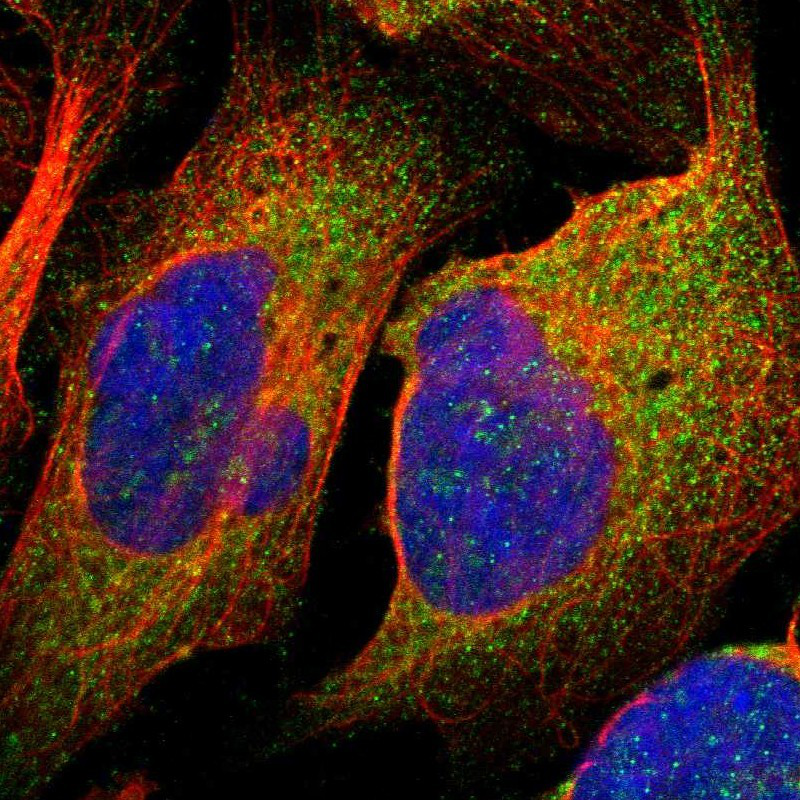

In [18]:
from PIL import Image
import glob
extra_image_dir = os.path.join(extra_data_dir, 'external_data')
imgs_path_list = glob.glob(os.path.join(extra_image_dir, '*'))
img = Image.open(imgs_path_list[0])
print(img.size)
img

In [32]:
#only old names
data = []
for i in tqdm_notebook(range(len(subcellular_location))):
    im_name  = subcellular_location['Gene'].values[i]+'-'+subcellular_location['Gene name'].values[i]
    for im in glob.glob(os.path.join(extra_image_dir, im_name+'*')):
        labels = []
        for name in subcellular_location['names'].values[i]:
            try:
                if name == 'Rods & Rings': name = "Rods & rings"
                labels.append(list(label_names.values()).index(name))          
            except:
                pass

        if len(labels)>0:
#             data.append([os.path.split(im)[-1].split('.png')[0], subcellular_location['names'].values[i], labels])
              data.append([os.path.split(im)[-1].split('.png')[0], labels])

A Jupyter Widget

In [33]:

df = pd.DataFrame(data, columns = ['Id', 'Target'])
df.to_csv(os.path.join(extra_data_dir, 'extra_data.csv'))
df.head(100)

,Id,Target
0,ENSG00000000003-TSPAN6_0,[25]
1,ENSG00000000457-SCYL3_0,"[14, 5]"
2,ENSG00000000460-C1orf112_0,[23]
3,ENSG00000000938-FGR_0,"[24, 21]"
4,ENSG00000001084-GCLC_0,"[25, 2]"
5,ENSG00000001084-GCLC_1,"[25, 2]"
6,ENSG00000001167-NFYA_0,[0]
7,ENSG00000001460-STPG1_0,[0]
8,ENSG00000001461-NIPAL3_0,[0]
9,ENSG00000001497-LAS1L_0,"[0, 25, 18]"


In [22]:
len(df)

12760

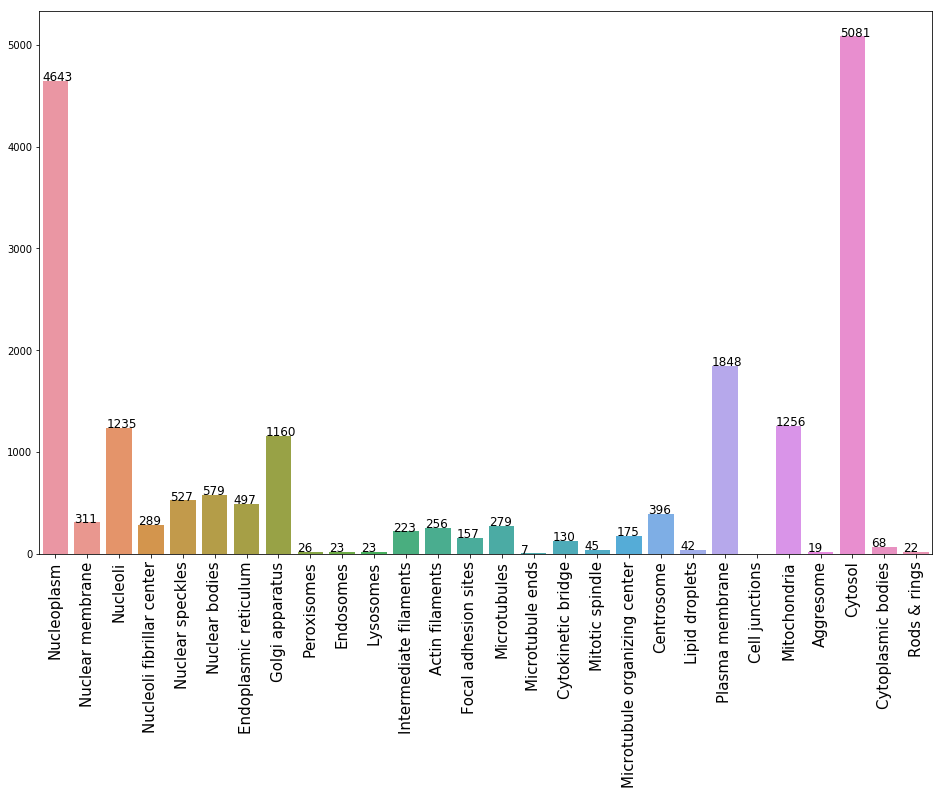

In [27]:
from itertools import chain
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns
count_labels = Counter(list(chain.from_iterable(df['labels'].values)))
plt.figure(figsize = (16,10))
sns.barplot(list(label_names), [count_labels[k] for k in list(label_names)],)
plt.xticks(list(label_names),list(label_names.values()), rotation=90, size = 15)
for i in count_labels:
    plt.text(i-0.4,count_labels[i], count_labels[i], size =12)
plt.show()